## 1- Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 2- Loading the dataset

In [2]:
from sklearn.datasets import make_regression
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [3]:
y = y + abs(y/2)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


## 3- Visualtising the feature variable across the target

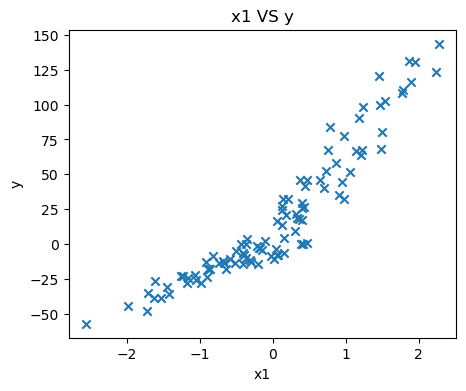

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(X,y,marker='x')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 VS y')
plt.show()

## 4- To a polynomial feature of degree 2

In [5]:
X_poly = np.hstack((np.ones((X.shape[0],1)),X,X**2))

In [6]:
print(X_poly[:10,:])

[[ 1.         -0.35955316  0.12927848]
 [ 1.          0.97663904  0.95382381]
 [ 1.          0.40234164  0.1618788 ]
 [ 1.         -0.81314628  0.66120688]
 [ 1.         -0.88778575  0.78816353]
 [ 1.          0.44386323  0.19701457]
 [ 1.         -0.97727788  0.95507205]
 [ 1.          0.42833187  0.18346819]
 [ 1.          0.20827498  0.04337847]
 [ 1.         -0.31155253  0.09706498]]


# Polynomial regression model

## 1- Initializing parameters

In [7]:
def initializing_parameters(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w,b

In [8]:
w,b = initializing_parameters(X_poly.shape[1])

In [9]:
print("w= ",w)
print("b= ",b)

w=  [[0.]
 [0.]
 [0.]]
b=  0.0


## 2- Defining the model

In [10]:
def model(w,b,X):
    return np.dot(X,w) + b

## 3- Computing the cost function

In [11]:
def cost_function(w,b,X,y):
    m = X.shape[0]
    return 1/(2*m) * np.sum((model(w,b,X)-y)**2)

In [12]:
print(cost_function(w,b,X_poly,y))

1282.0304017733056


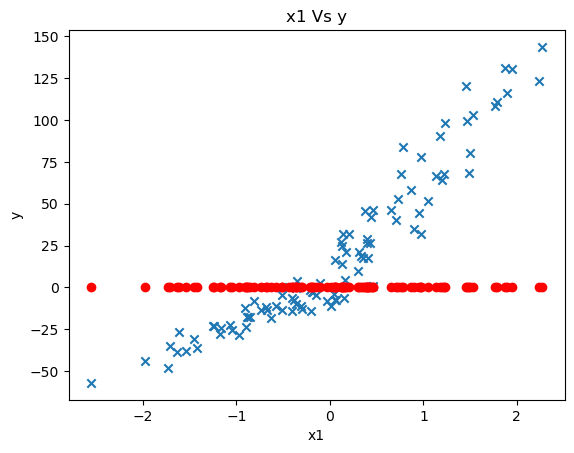

In [13]:
# Visualizing the initial model
plt.scatter(X,y,marker='x')
plt.scatter(X,model(w,b,X_poly),c='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 Vs y')
plt.show()

## 4- Gradient descent

In [14]:
def gradient(w,b,X,y):
    m = X.shape[0]
    dj_dw = 1/m * np.dot(X.T, model(w,b,X)-y)
    dj_db = 1/m * np.sum(model(w,b,X)-y)
    return dj_dw, dj_db

In [15]:
def gradient_descent(w,b,X,y,learning_rate,epochs):
    history = []
    for i in range(epochs):
        dj_dw,dj_db = gradient(w,b,X,y)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        history.append(cost_function(w,b,X,y))
    return w,b,history

In [16]:
learning_rate = 0.01
epochs = 1000
w,b,history = gradient_descent(w,b,X_poly,y,learning_rate,epochs)

In [17]:
print(f"Iteration{1:4d}: {history[0]}")
for i in range(len(history)):
    if (i+1)%100 == 0:
        print(f"Iteration{i:4d}: {history[i]}")

Iteration   1: 1238.8551988917936
Iteration  99: 192.02411729802103
Iteration 199: 93.06475744205646
Iteration 299: 79.90403266808381
Iteration 399: 78.13002105652525
Iteration 499: 77.88721897457461
Iteration 599: 77.85336785135884
Iteration 699: 77.84854535201656
Iteration 799: 77.84784151639234
Iteration 899: 77.84773610769777
Iteration 999: 77.84771990277267


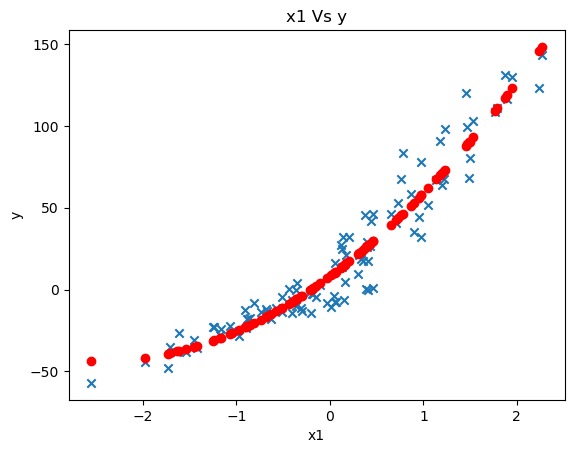

In [18]:
# Visualizing the last model 
plt.scatter(X,y,marker='x')
plt.scatter(X,model(w,b,X_poly),c='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 Vs y')
plt.show()

## 5- The learning curve

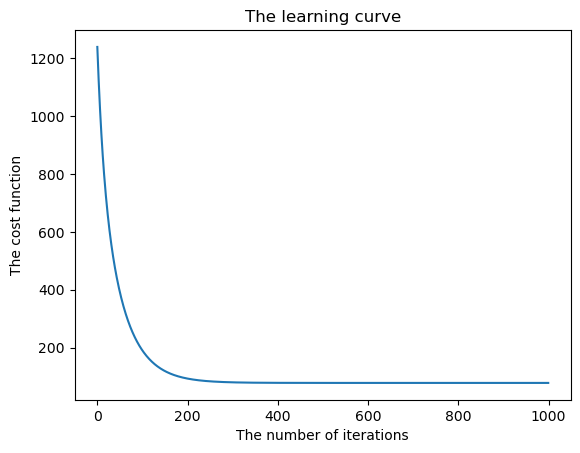

In [19]:
plt.plot(range(len(history)), history)
plt.xlabel('The number of iterations')
plt.ylabel('The cost function')
plt.title('The learning curve')
plt.show()

## 6- Evaluating the model - Coefficient of determination

In [20]:
def coef_determination(w,b,X,y):
    RSS = np.sum((y-model(w,b,X))**2)
    TSS = np.sum((y-np.mean(y))**2)
    return 1 - RSS/TSS

In [21]:
print(coef_determination(w,b,X_poly,y))

0.9287188587651505
